In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Administrator\Desktop\Data Analyst Portfolio Projects\Python Movies\movies.csv\movies.csv')

In [4]:
#looking at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
#checking for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
#Data types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#Drop null values then changed the data type of budget and gross to interger
df = df.dropna()

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [8]:
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [27]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [10]:
df['budget_to_gross_ratio'] = df['budget']/df['gross']
df.sort_values(by='budget_to_gross_ratio', ascending=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,budget_to_gross_ratio
3203,Trojan War,PG-13,Comedy,1997,"October 1, 1997 (Brazil)",5.7,5800.0,George Huang,Andy Burg,Will Friedle,United States,15000000,309,Daybreak,85.0,1997,48543.689320
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001,1957.713391
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994,1683.501684
1898,The Lovers on the Bridge,R,Drama,1991,"July 2, 1999 (United States)",7.6,13000.0,Leos Carax,Leos Carax,Juliette Binoche,France,28000000,29679,Films A2,125.0,1999,943.428013
3413,Savior,R,Drama,1998,"November 20, 1998 (United States)",7.3,11000.0,Predrag Antonijevic,Robert Orr,Dennis Quaid,United States,10000000,14328,Initial Entertainment Group (IEG),103.0,1998,697.934115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5154,Once,R,Drama,2007,"June 15, 2007 (United States)",7.8,112000.0,John Carney,John Carney,Glen Hansard,Ireland,150000,20936722,Bórd Scannán na hÉireann,86.0,2007,0.007164
2093,El Mariachi,R,Action,1992,"February 26, 1993 (United States)",6.9,64000.0,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81.0,1993,0.003430
6815,The Gallows,R,Horror,2015,"July 10, 2015 (United States)",4.3,20000.0,Travis Cluff,Chris Lofing,Reese Mishler,United States,100000,42964410,New Line Cinema,81.0,2015,0.002328
3459,The Blair Witch Project,R,Horror,1999,"July 30, 1999 (United States)",6.5,239000.0,Daniel Myrick,Daniel Myrick,Heather Donahue,United States,60000,248639099,Haxan Films,81.0,1999,0.000241


In [11]:
df['profit'] = df['gross']-df['budget']
df.sort_values(by='profit', ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,budget_to_gross_ratio,profit
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,0.083238,2610246203
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,0.127256,2441501328
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,0.090841,2001647264
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,0.118385,1824521700
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,0.156711,1727359754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2700,Cutthroat Island,PG-13,Action,1995,"December 22, 1995 (United States)",5.7,27000.0,Renny Harlin,Michael Frost Beckner,Geena Davis,France,98000000,10017322,Beckner/Gorman Productions,124.0,1995,9.783054,-87982678
6023,Jin ling shi san chai,R,Drama,2011,"December 16, 2011 (China)",7.6,51000.0,Yimou Zhang,Heng Liu,Christian Bale,China,94000000,2855644,Beijing New Picture Film,146.0,2011,32.917268,-91144356
4218,The Adventures of Pluto Nash,PG-13,Action,2002,"August 16, 2002 (United States)",3.8,25000.0,Ron Underwood,Neil Cuthbert,Eddie Murphy,United States,100000000,7103973,Castle Rock Entertainment,95.0,2002,14.076630,-92896027
3485,The 13th Warrior,R,Action,1999,"August 27, 1999 (United States)",6.6,119000.0,John McTiernan,Michael Crichton,Antonio Banderas,United States,160000000,61698899,Touchstone Pictures,102.0,1999,2.593239,-98301101


In [23]:
#Drop any duplicates
df['company'].drop_duplicates().sort_values()

4345        "DIA" Productions GmbH & Co. KG
7525    "Weathering With You" Film Partners
3024                        .406 Production
3748                     1+2 Seisaku Iinkai
5813                        10 West Studios
                       ...                 
4007                               i5 Films
6412               iDeal Partners Film Fund
5664                            micro_scope
7129                                thefyzz
408                                     NaN
Name: company, Length: 2386, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

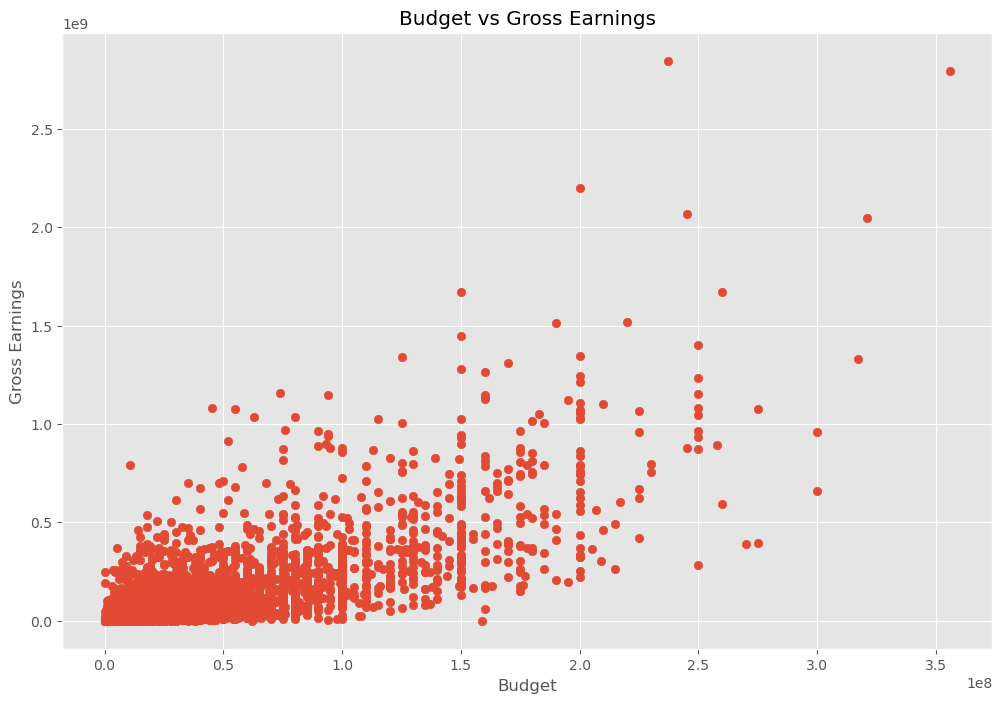

In [24]:
#Scatter plot with budget vs gross revenue

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.ylabel('Gross Earnings')
plt.xlabel('Budget')
plt.show

In [14]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,budget_to_gross_ratio,profit
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,0.083238,2610246203
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,0.127256,2441501328
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,0.090841,2001647264
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,0.118385,1824521700
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,0.156711,1727359754


<Axes: xlabel='budget', ylabel='gross'>

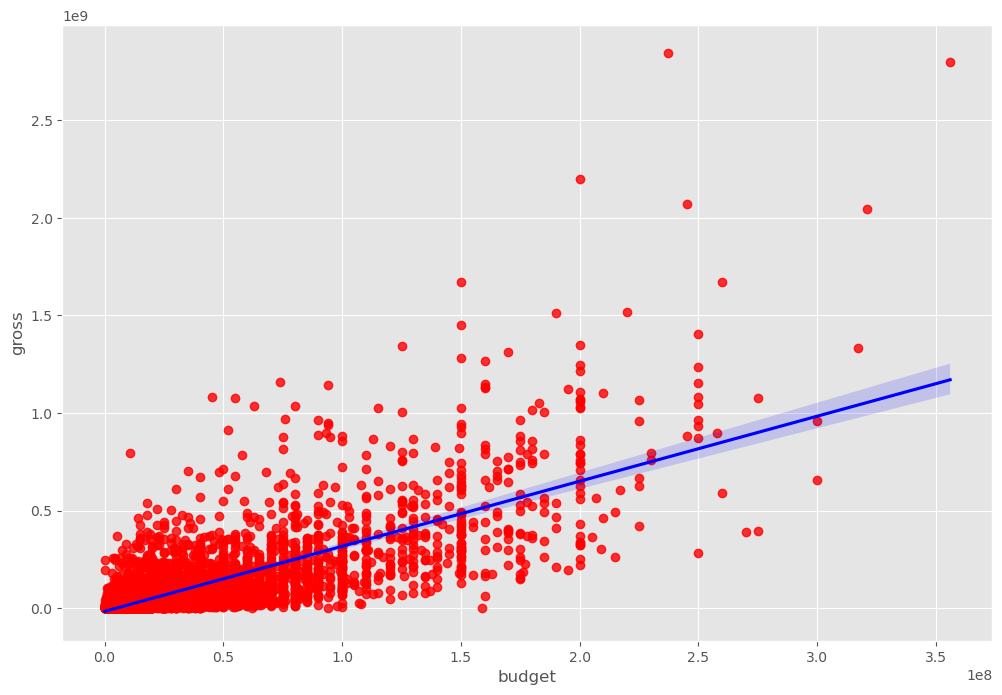

In [15]:
#plot budget vs gross using seaborn
sns.regplot(x='budget',y='gross', data=df , scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [16]:
df.corr(method='pearson',numeric_only=True)

,year,score,votes,budget,gross,runtime,yearcorrect,budget_to_gross_ratio,profit
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726,-0.008327,0.237456
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923,-0.012515,0.243340
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098,-0.011096,0.609203
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312,-0.009937,0.610530
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721,-0.010735,0.984428
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294,-0.018810,0.241554
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000,-0.008001,0.232797
budget_to_gross_ratio,-0.008327,-0.012515,-0.011096,-0.009937,-0.010735,-0.018810,-0.008001,1.000000,-0.010048
profit,0.237456,0.243340,0.609203,0.610530,0.984428,0.241554,0.232797,-0.010048,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

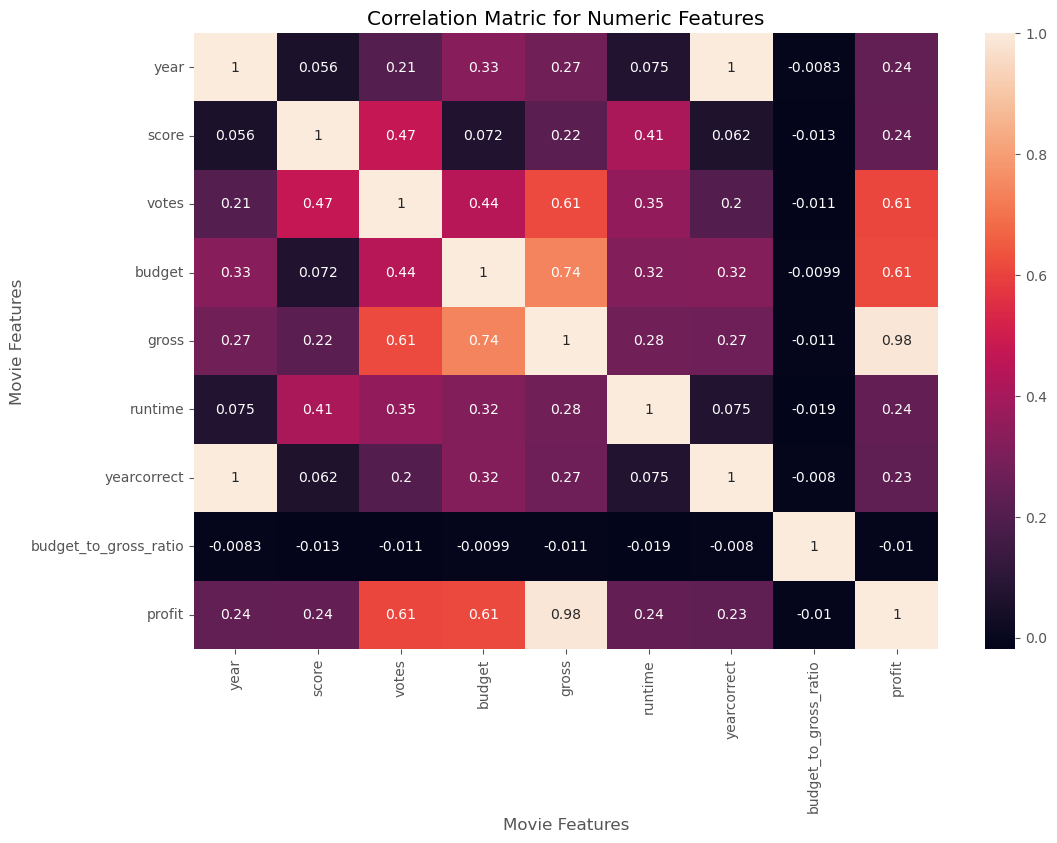

In [17]:
correlation_matrix = df.corr(method='pearson',numeric_only=True)
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')
plt.show

In [18]:
#Look at Company
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,budget_to_gross_ratio,profit
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,0.083238,2610246203
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,0.127256,2441501328
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,0.090841,2001647264
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,0.118385,1824521700
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,0.156711,1727359754


In [19]:
df_Numbered = df
for col_name in df_Numbered.columns:
    if(df_Numbered[col_name].dtype == 'object'):
        df_Numbered[col_name] = df_Numbered[col_name].astype('category')
        df_Numbered[col_name] = df_Numbered[col_name].cat.codes
df_Numbered

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,budget_to_gross_ratio,profit
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009,0.083238,2610246203
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019,0.127256,2441501328
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997,0.090841,2001647264
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015,0.118385,1824521700
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018,0.156711,1727359754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500.0,585,2924,1498,47,3000000,5073,1385,96.0,2015,591.366056,-2994927
2434,2969,5,0,1993,1467,4.5,1900.0,1805,3102,186,47,5000000,2970,1376,97.0,1994,1683.501684,-4997030
3681,1595,3,6,2000,1721,6.8,43000.0,952,1683,527,6,5000000,2554,466,108.0,2001,1957.713391,-4997446
272,2909,6,9,1982,1525,3.9,2300.0,261,55,1473,47,800000,2270,582,85.0,1982,352.422907,-797730


<function matplotlib.pyplot.show(close=None, block=None)>

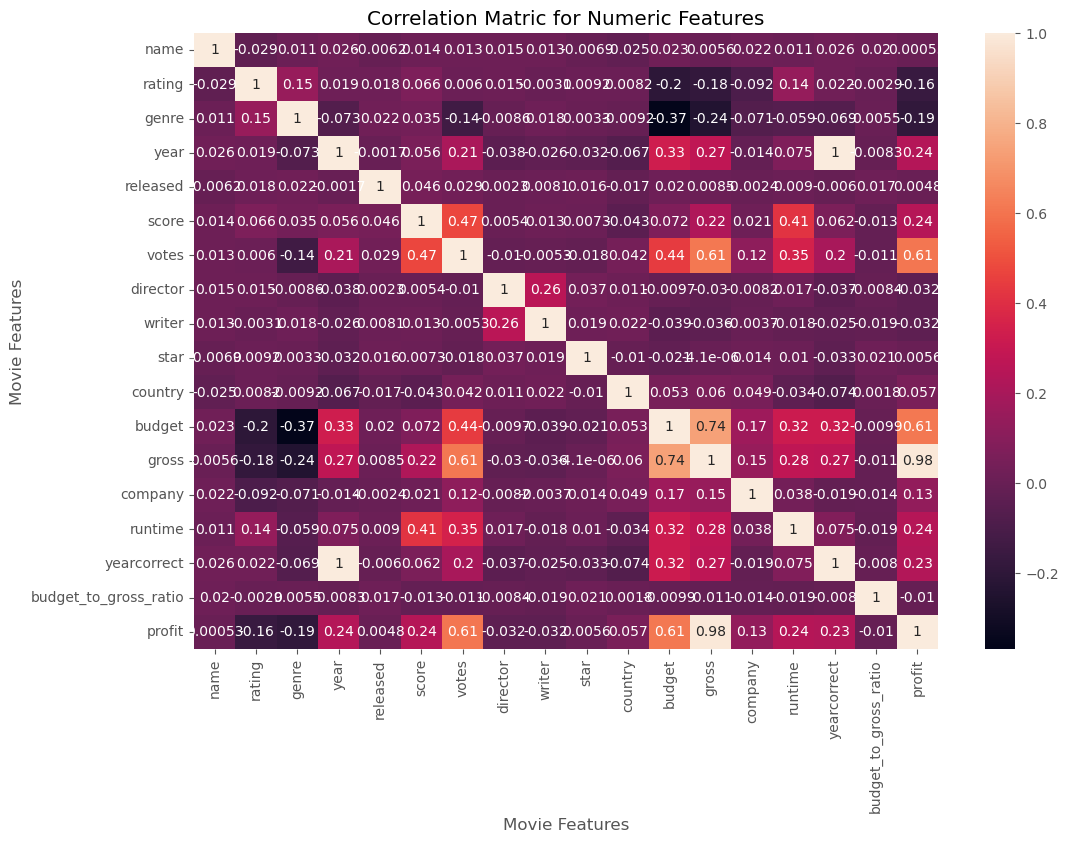

In [29]:
correlation_matrix = df_Numbered.corr(method='pearson',numeric_only=True)
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.ylabel('Movie Features')
plt.xlabel('Movie Features')
plt.show

In [37]:
pd.set_option('display.max_rows', None)
correlation_mat = df_Numbered.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name                   name                     1.000000
                       rating                  -0.029234
                       genre                    0.010996
                       year                     0.025542
                       released                -0.006152
                       score                    0.014450
                       votes                    0.012615
                       director                 0.015246
                       writer                   0.012880
                       star                    -0.006882
                       country                 -0.025490
                       budget                   0.023392
                       gross                    0.005639
                       company                  0.021697
                       runtime                  0.010850
                       yearcorrect              0.025542
                       budget_to_gross_ratio    0.019841
                       profit  

In [44]:
sorted_pairs = corr_pairs.sort_values(ascending=False)
sorted_pairs

name                   name                     1.000000
star                   star                     1.000000
year                   year                     1.000000
released               released                 1.000000
score                  score                    1.000000
votes                  votes                    1.000000
director               director                 1.000000
writer                 writer                   1.000000
country                country                  1.000000
rating                 rating                   1.000000
budget                 budget                   1.000000
gross                  gross                    1.000000
company                company                  1.000000
runtime                runtime                  1.000000
yearcorrect            yearcorrect              1.000000
budget_to_gross_ratio  budget_to_gross_ratio    1.000000
genre                  genre                    1.000000
profit                 profit  

In [50]:
#Budget and Gross have the highest correlation among variables that are not related by definition
#The correlation between the number of votes received and profit is higher than the correlation between the score of votes received and profit
high_corr = sorted_pairs[sorted_pairs > 0.5]
high_corr

name                   name                     1.000000
star                   star                     1.000000
year                   year                     1.000000
released               released                 1.000000
score                  score                    1.000000
votes                  votes                    1.000000
director               director                 1.000000
writer                 writer                   1.000000
country                country                  1.000000
rating                 rating                   1.000000
budget                 budget                   1.000000
gross                  gross                    1.000000
company                company                  1.000000
runtime                runtime                  1.000000
yearcorrect            yearcorrect              1.000000
budget_to_gross_ratio  budget_to_gross_ratio    1.000000
genre                  genre                    1.000000
profit                 profit  